## Prosper Loan Data Exploration

### Preliminary Wrangling

In [1]:
# importing require packages for prosper loan exploration
from zipfile import ZipFile 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings

### Accessing the Data 

In [2]:
#accessing data using pandas read_csv function and storing values in df variable
df = pd.read_csv('prosperLoanData.csv')

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# copying from original data to data_clean variable, because it doesn't affect the original datasets
df_clean = df.copy()

In [5]:
df_clean.shape

(113937, 81)

In [6]:
df_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [8]:
n = list(df_clean)

In [9]:
n1 = n[0:10]

In [10]:
df_clean[n1]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529


In [11]:
n2 = n[10:20]

In [12]:
df_clean[n2]

,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus
0,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed
1,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed
2,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available
3,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed
4,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed
5,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed
6,0.23820,0.1275,0.11070,2.0,E,2.0,1,KS,Sales - Retail,Employed
7,0.17830,0.0799,0.09840,4.0,C,4.0,2,CA,Laborer,Employed
8,0.05221,0.0099,0.04231,7.0,AA,9.0,7,IL,Food Service,Employed
9,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed


In [13]:
#from 81 columns most used columns are only selected 
prosper = df_clean[['ListingNumber','CreditGrade','Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','ProsperRating (numeric)','ProsperScore','BorrowerState','Occupation','EmploymentStatus','EmploymentStatusDuration','LoanNumber','LoanOriginalAmount','IncomeRange','StatedMonthlyIncome','PercentFunded','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors','ProsperRating (Alpha)','IncomeVerifiable','DelinquenciesLast7Years','AmountDelinquent','DebtToIncomeRatio','CurrentDelinquencies']]


### Dataset Overview
There are 113937 rows and 81 columns, most variables data types are in objects, int, float,and bool.
from 81 columns, i choosed only 26 columns only,removed duplicated entry from the datasets that makes sure data clean,so of tidy issues are not solved because of data size.

### Investigation Overview
While Investigation of dataset, more focused on CreditGrade , Term , LoanStatus, BorrowerAPR and etc, this investigation more helpful for first time applying loans on prosper and how is loan proposal is selected, so this things decipted in form of charts like hist, scatter, bar charts so on.

### What is/are the main feature(s) of interest in your dataset?
Interested more on borrower_rate, Loan_original_amount,and LenderYield and etc

### Data Wrangling

1) Drop the duplicates

#### Code

In [14]:
prosper.duplicated().sum()

0

In [15]:
#prosper[prosper['ListingNumber'].duplicated()]
prosper[prosper['ListingNumber']==1023355]

,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (numeric),ProsperScore,BorrowerState,...,PercentFunded,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ProsperRating (Alpha),IncomeVerifiable,DelinquenciesLast7Years,AmountDelinquent,DebtToIncomeRatio,CurrentDelinquencies
8,1023355,NaN,36,Current,0.0762,0.0629,0.0529,7.0,9.0,IL,...,1.0,0,0.0,1,AA,True,0.0,0.0,0.25,0.0
9,1023355,NaN,36,Current,0.0762,0.0629,0.0529,7.0,11.0,IL,...,1.0,0,0.0,1,AA,True,0.0,0.0,0.25,0.0


In [16]:
prosper.drop_duplicates('ListingNumber',inplace=True)

#### Test

In [17]:
prosper.ListingNumber.duplicated().sum()

0

In [18]:
# Taking average of CreditScoreRangeLower and CreditScoreRangeUpper  for Credit Score
prosper['Credit_score'] = df_clean.CreditScoreRangeLower + df_clean.CreditScoreRangeUpper/2

#### Univariate Exploration

### 1) What is  Prosper Loan Current Status ?

In [19]:
prosper.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

## Prosper Loan Status
Current active user of loan prosper are 55730, Completed from prosper loan 38061, Chargedoff from prosper loan11992, Defaulted from prosper loan 5018, Past Due (1-15 days) from prosper loan 800, Past Due (31-60 days) from prosper loan 361, Past Due (61-90 days) from prosper loan 311, Past Due (91-120 days) from prosper loan 304, Past Due (16-30 days) from prosper loan 265, FinalPaymentInProgress from prosper loan 203, Past Due (>120 days) from prosper loan 16, Cancelled from prosper loan 5,

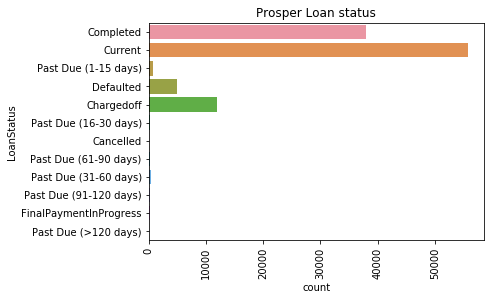

In [20]:
sb.countplot(data = prosper,y='LoanStatus');
plt.xticks(rotation = 90);
plt.title('Prosper Loan status');

Answer: Status of prosper loan were:
Current active user of loan prosper are 55730,
Completed  from prosper loan 38061,
Chargedoff  from prosper loan11992,
 Defaulted   from prosper loan 5018,
Past Due (1-15 days)  from prosper loan 800,
Past Due (31-60 days) from prosper loan  361,
 Past Due (61-90 days) from prosper loan 311,
Past Due (91-120 days)  from prosper loan  304,
Past Due (16-30 days)  from prosper loan 265,
 FinalPaymentInProgress  from prosper loan 203,
Past Due (>120 days)  from prosper loan 16,
Cancelled  from prosper loan 5,

### 2)Which types of people uses prosper loan ?

In [21]:
#sb.countplot(data = prosper,x=prosper.LoanOriginalAmount)

In [22]:
n = prosper.LoanOriginalAmount.value_counts()

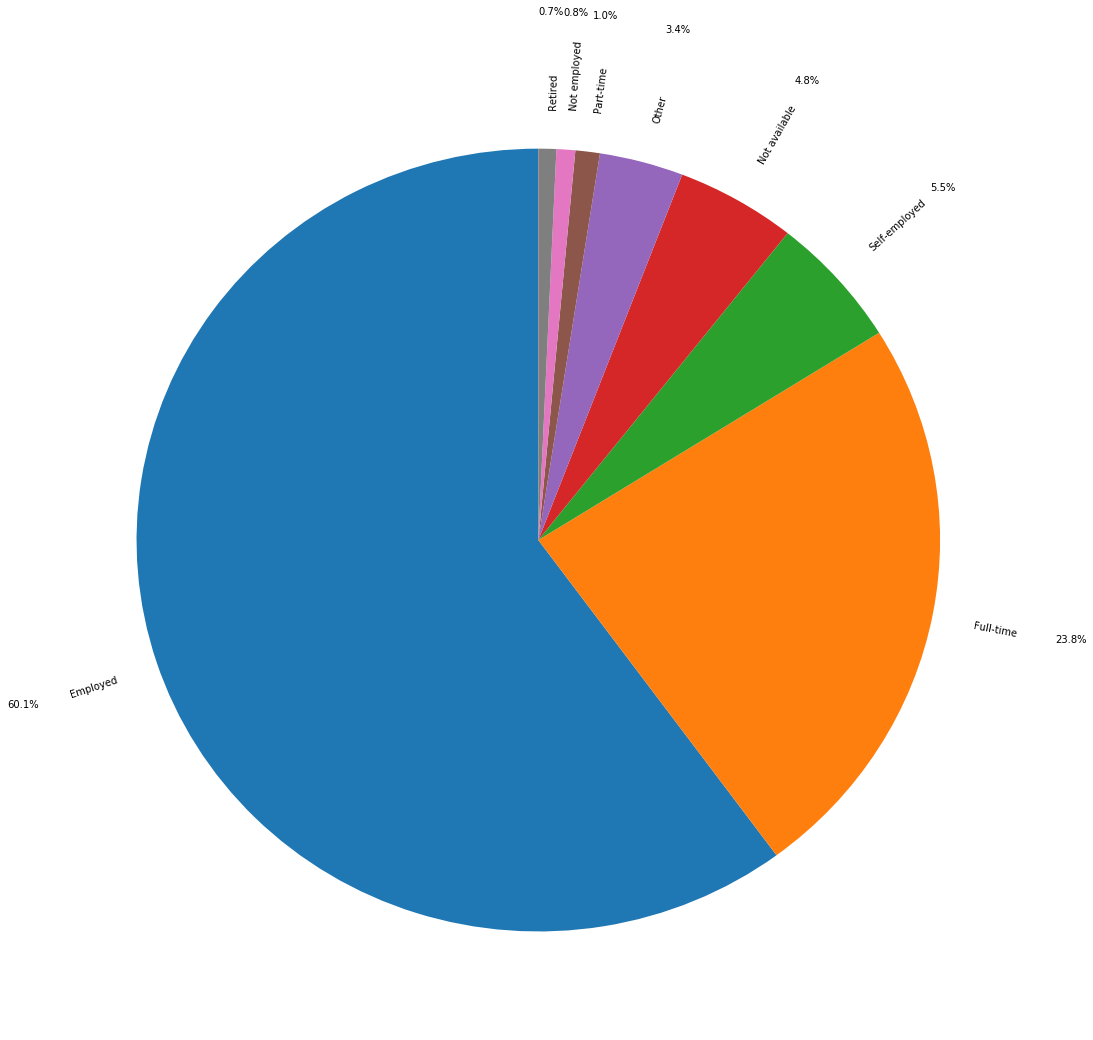

In [23]:
com = prosper.EmploymentStatus.value_counts()
plt.figure(figsize=[18,18],);
plt.pie(com,labels=com.index,startangle=90,rotatelabels=True,autopct='%1.1f%%',pctdistance=1.35);

Answer:employes types of people use more prosper loan of 60.1 and the second highest is full time employes uses around 23.8,and second least user are not employed around 0.8 and least beneficial are retired people around 0.7.

### 3) What kind professinal uses the most prosper loan

In [24]:
n = prosper.Occupation.value_counts()

In [25]:
n_occup = prosper.shape[0]
print(n_occup)
max_occup = n[0]
print(max_occup)
max_occup1 = max_occup/n_occup
print(max_occup1)

113066
28422
0.25137530292041815


In [26]:
tick_props = np.arange(0,max_occup1,0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]


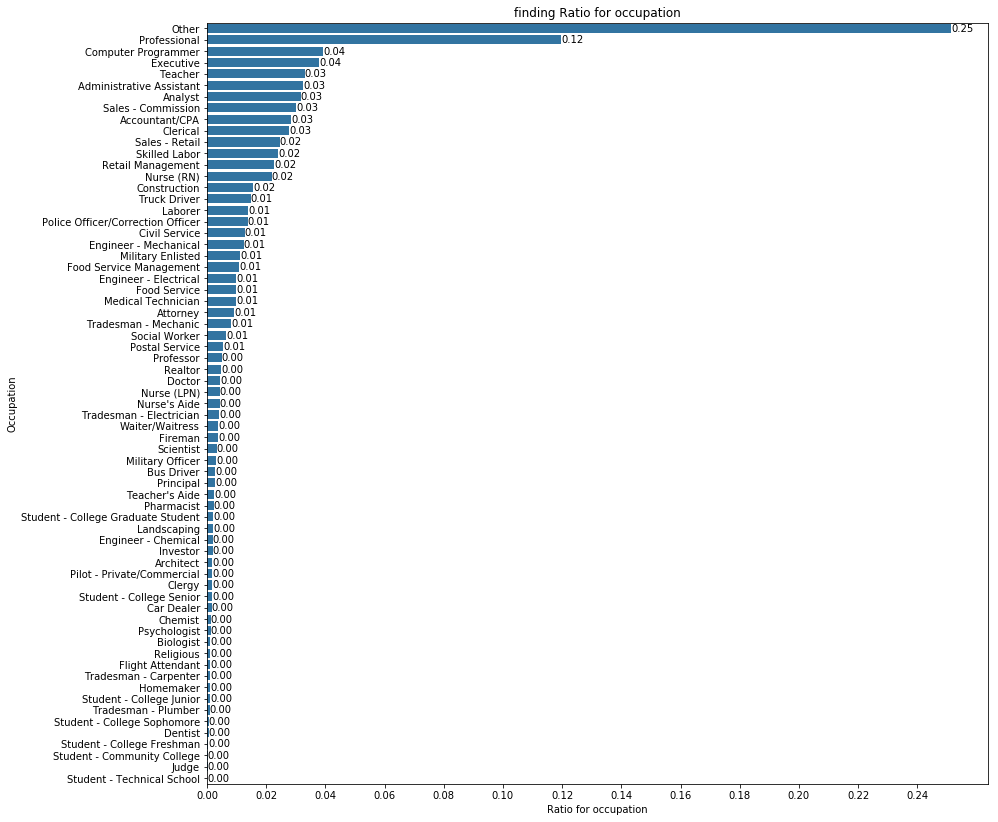

In [27]:
#order_base = prosper.Occupation.value_counts().index
plt.figure(figsize=[14,14])
base_color = sb.color_palette()[0]
sb.countplot(y=prosper.Occupation,color=base_color,order = n.index);
plt.title('finding Ratio for occupation');
plt.ylabel('Occupation');
plt.xlabel('Ratio for occupation');
plt.xticks(tick_props*n_occup,tick_names);
counts = prosper.Occupation.value_counts()
for i in range(counts.shape[0]):
    count = counts[i]
    pct_string = '{:0.2f}'.format( count/n_occup)
    plt.text(count+2,i,pct_string,va = 'center');

Answer: The other types of professional uses most prosper loan of around 0.25,The second highest user of Prosper loan is professional, the second lowest is food service management of 0.1 and the least user half of professional .

### 4) Lender Yield Exploration

## Lender Yield Exploration
Lender Yield Exploration model has huge range of values, the lowest data points lies at 0.0 and 0.35, and highest range of values lies between 0.1 to 0.2,lender Yield exploration model looks like right skewed, plotted on a probabalitc form,

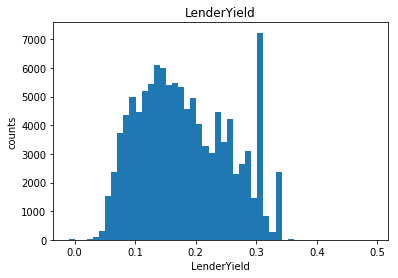

In [28]:
plt.hist(data = prosper,x='LenderYield',bins = 50);
plt.title('LenderYield');
plt.ylabel('counts');
plt.xlabel('LenderYield');

In [29]:
#prosper.pivot_table(index=['BorrowerState'],values='LoanOriginalAmount')

In [30]:
#https://stackoverflow.com/questions/42134486/typeerror-pivot-table-got-multiple-values-for-keyword-argument-values
#plt.figure(figsize=[])
#prosper.pivot_table(index=['BorrowerState'],values='LoanOriginalAmount').plot(kind='bar')
#prosper.pivot_table(index=['BorrowerState'],values='LoanOriginalAmount').plot(kind='bar')


### 5) Which state most uses the prosper loan ?

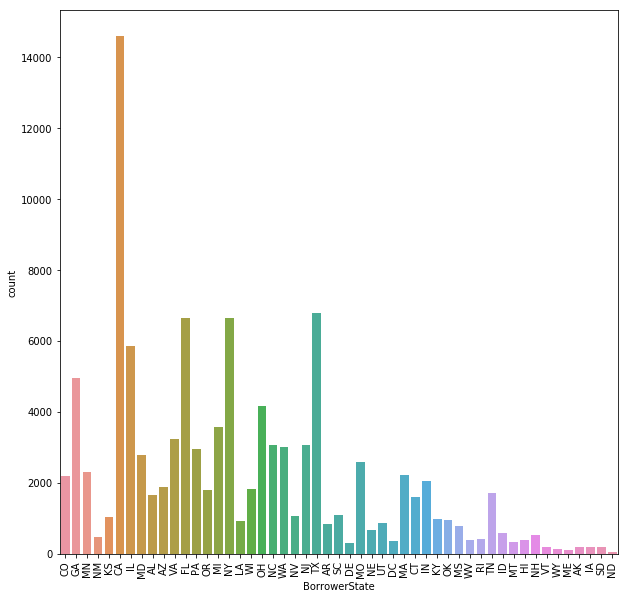

In [31]:
plt.figure(figsize=[10,10])
base_color = sb.color_palette()[0]
sb.countplot(data = prosper,x='BorrowerState');
plt.xticks(rotation = 90);


Answer CA state user use most prosper loan around 14250, the second highest user are Tx around 6500,the second least user from Me around 500 and the least user from ND around 100.

### 6)How many accounts verfied from prosper loan ?

## Income verifiable

In prosper loan data there is huge question that, how many loans income verified, around 1000 loans data is not  verified and 100000 is verfied in prosper loan data. 

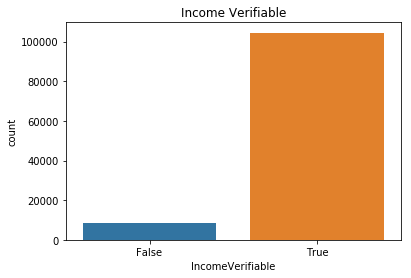

In [32]:
#sb.countplot(df.IncomeVerifiable)

sb.countplot(prosper.IncomeVerifiable);
plt.title('Income Verifiable');

Answer: around 10000 accounts are verfied, and 10000 are still not verified

### 7) From amounts to find which rate of si ?

In [33]:
#plt.figure(figsize=[10,10])
#plt.subplot(2,1,1)
#sb.regplot(data = prosper,x='LoanOriginalAmount',y='BorrowerRate',fit_reg=False,x_jitter=1)
#plt.title('Comparing the difference between LoanoriginalAmount Vs BorrowerRate')
#plt.xlabel('LoanOriginalAmount')
#plt.ylabel('BorrowerRate')
#plt.show()
#plt.subplot(2,1,1)
#bins_x = np.arange(1000.000000,prosper.LoanOriginalAmount.max() + 100,2000)
#bins_y = np.arange(0.000000,prosper.BorrowerRate.max() + 0.1, 0.05)
#plt.hist2d(data = prosper,x='LoanOriginalAmount',y='BorrowerRate',cmin=0.5,cmap = 'viridis_r',bins = [bins_x,bins_y])
#plt.title('comparing LoanOriginalAmount vs BorrowerRate')
#plt.xlabel('LoanOriginalAmount')
#plt.ylabel('BorrowerRate')
#plt.colorbar()
#plt.show()

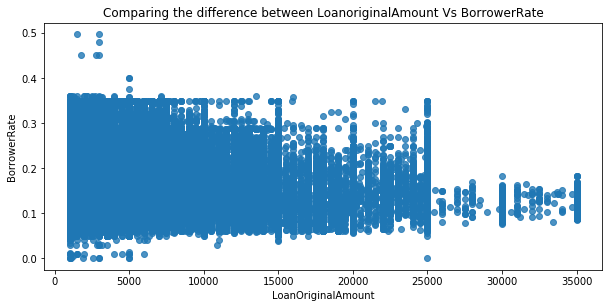

In [34]:
plt.figure(figsize=[10,10])
plt.subplot(2,1,1)
sb.regplot(data = prosper,x='LoanOriginalAmount',y='BorrowerRate',fit_reg=False,x_jitter=1);
plt.title('Comparing the difference between LoanoriginalAmount Vs BorrowerRate');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('BorrowerRate');
plt.show();

In [35]:
prosper[['LoanOriginalAmount','BorrowerRate']].describe()

,LoanOriginalAmount,BorrowerRate
count,113066.000000,113066.000000
mean,8314.762307,0.192946
std,6237.007841,0.074917
min,1000.000000,0.000000
25%,4000.000000,0.134000
50%,6300.000000,0.184000
75%,12000.000000,0.250600
max,35000.000000,0.497500


## comparing LoanOriginalAmount vs BorrowerRate

LoanOriginalAmount vs Borrowerrate has huge data,intially used scatter plot answer this, but of points are overlapped, so I used hist2d, this chart predict the Borrower Rate of interset with Loan Orginal Amount, for 5000 loan amount most of points lies between 0.2 to 0.35, for 10000 most of points lies between 0.1 to 0.25, for 15000 most of points lies between 0.1 to 0.2, according to this chart when ever loan amount increases Borrower Rate decreases, this may due to small amount of people get large loan amounts.

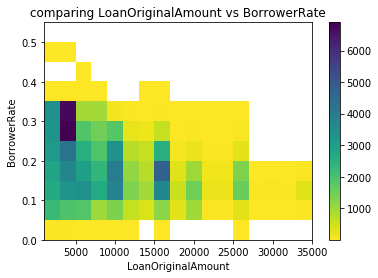

In [36]:
bins_x = np.arange(1000.000000,prosper.LoanOriginalAmount.max() + 100,2000)
bins_y = np.arange(0.000000,prosper.BorrowerRate.max() + 0.1, 0.05)
plt.hist2d(data = prosper,x='LoanOriginalAmount',y='BorrowerRate',cmin=0.5,cmap = 'viridis_r',bins = [bins_x,bins_y]);
plt.title('comparing LoanOriginalAmount vs BorrowerRate');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('BorrowerRate');
plt.colorbar();
plt.show();

### Bivariate Exploration

In [37]:
#df_clean.CreditScoreRangeUpper

### 7) Relationship between DelinquenciesLast7Years V/s AmountDelinquent

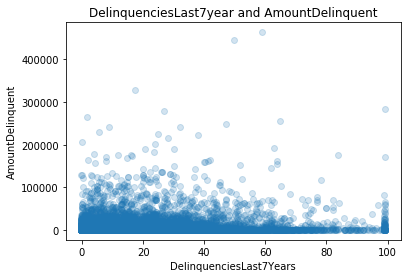

In [38]:
sb.regplot(data = prosper, x='DelinquenciesLast7Years',y='AmountDelinquent',fit_reg=False,scatter_kws={'alpha':1/5},x_jitter=0.3);
plt.title('DelinquenciesLast7year and AmountDelinquent');

Answer: in this relationship most of points when ever Delinquencielast7years increase amountDelinquent decreases

### 8) Correlation between Credit_score,BorrowerAPR,DelinquenciesLast7Years,AmountDelinquent,CurrentDelinquencies

In [39]:
var = ['Credit_score','BorrowerAPR','DelinquenciesLast7Years','AmountDelinquent','CurrentDelinquencies']

Text(0.5,1,'Relationship betweens varibable')

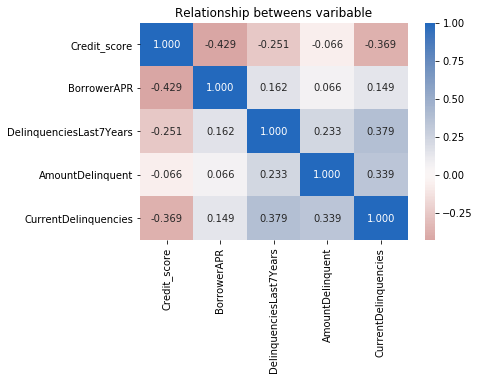

In [40]:
sb.heatmap(prosper[var].corr(),annot = True,fmt='.3f',cmap = 'vlag_r', center = 0);
plt.title('Relationship betweens varibable')

Answer: the above chart tends the correlation ship Credit_score','BorrowerAPR','DelinquenciesLast7Years','AmountDelinquent','CurrentDelinquencies

### 9) which types employementStatus have highest prosper score

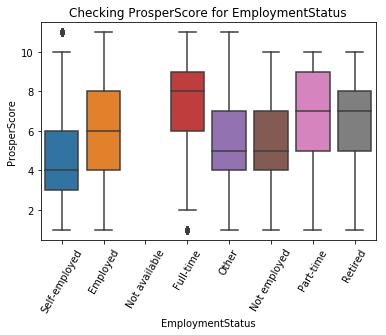

In [41]:
sb.boxplot(data = prosper, x='EmploymentStatus',y='ProsperScore');
plt.xticks(rotation = 60);
plt.title('Checking ProsperScore for EmploymentStatus');
plt.xlabel('EmploymentStatus');
plt.ylabel('ProsperScore');

;Answer: Employed employer status have highest propser score of around 12, and the second highest is full time emplyer status of 11, the second lowest of prosper score is retired,part time of around 10,the least score is for not employed

### 10) checking credit grade for orginial amount

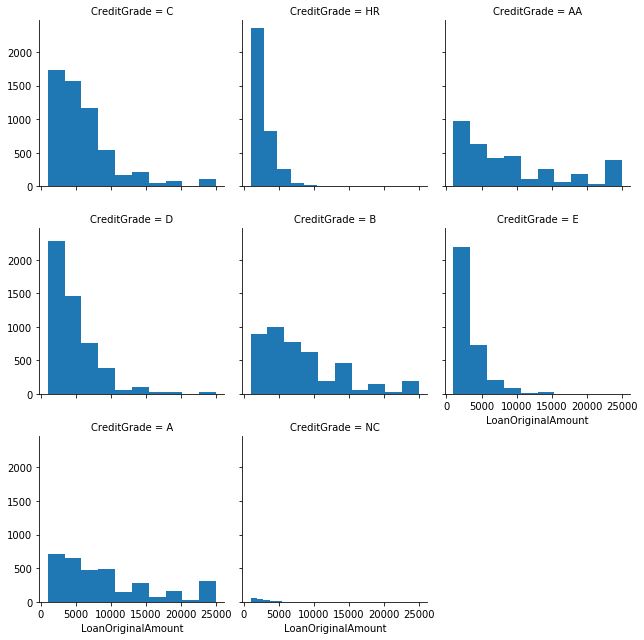

In [42]:
g = sb.FacetGrid(data = prosper,col ='CreditGrade',col_wrap=3);
g.map(plt.hist,'LoanOriginalAmount');

Answer: above plot credit grade for orginial amount,most of credit grade are from D

### Multivariate Exploration

### 11) relationship between CurrentDelinquencies,Borrower and BorrowerRate

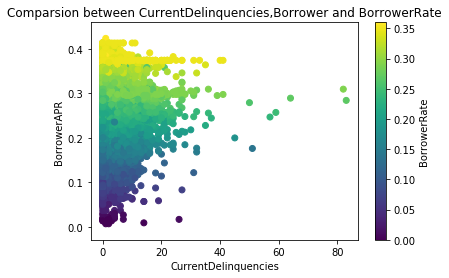

In [43]:
plt.scatter(data = prosper,x='CurrentDelinquencies',y='BorrowerAPR',c='BorrowerRate');
plt.colorbar(label='BorrowerRate');
plt.xlabel('CurrentDelinquencies');
plt.ylabel('BorrowerAPR');
plt.title('Comparsion between CurrentDelinquencies,Borrower and BorrowerRate');

This is an observation chart, this chart will idea between current delinquencies,BorrowerApr, with BorrowerRate.CurrentDelinquencies(Number of accounts delinquent at the time the credit profile was pulled.)borrowerApr(BorrowerAPR The Borrower's Annual Percentage Rate (APR) for the loan.), BorrowerRate(The Borrower's interest rate for this loan.), if accounts delinquent credit profile pulled how does affect BorrowerApr and borrower rate,
it seems whenever currentDelinquencies increases BorrowerApr and borrower rate decrease

### 12) income verifiable for upto what extend of loan amounts ?

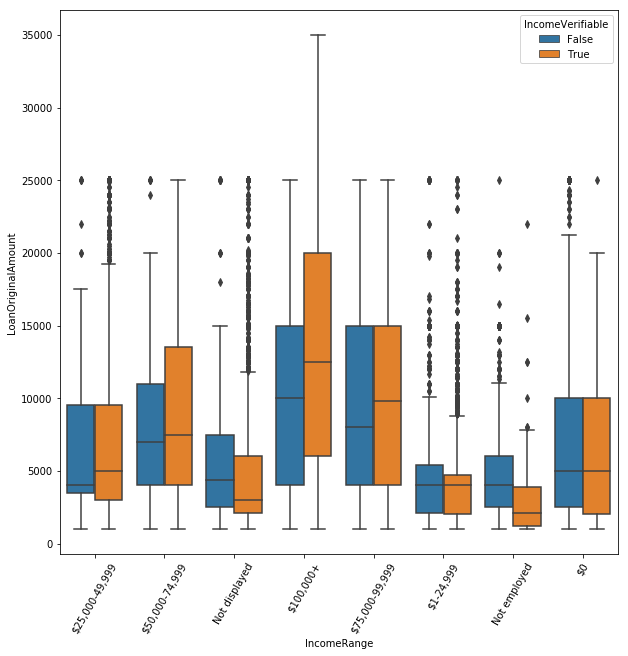

In [44]:
plt.figure(figsize=[10,10]);
sb.boxplot(data = prosper,x='IncomeRange',y='LoanOriginalAmount',hue = 'IncomeVerifiable');

plt.xticks(rotation = 60);

This chart is case study format, in this chart to what extent income profile is verified, whenever loan amount increases the income profile is validated in most of the condition, for applying loan amount of 100000 most of accounts are verified, and for not employed loans are issued from above chart above chart tends that, for not employed loans are stationed around 10000 for not income verified.

### 13) Most Loan eligible candiate

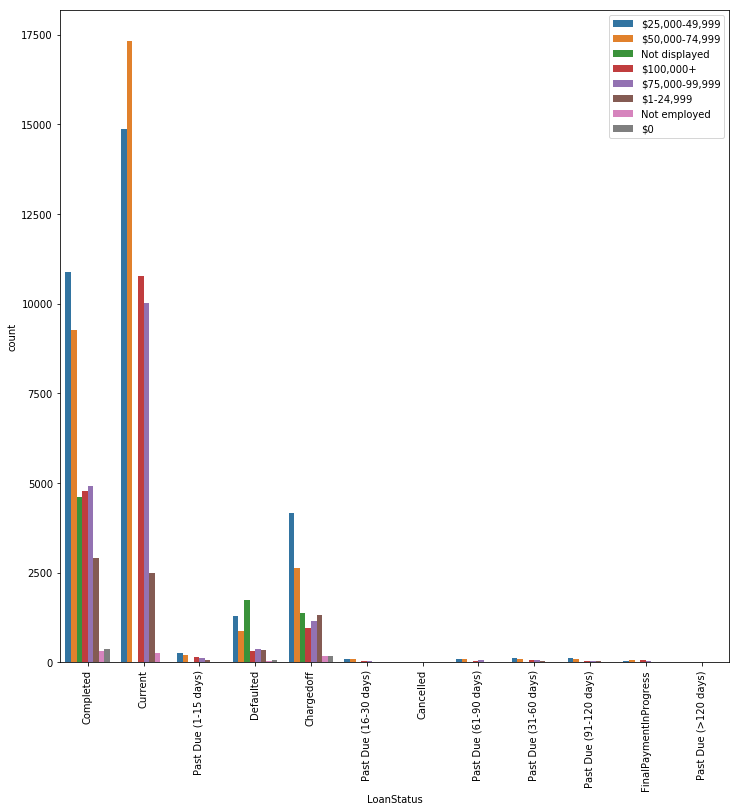

In [45]:
plt.figure(figsize=[12,12]);
sb.countplot(data = prosper,x='LoanStatus',hue='IncomeRange');
plt.xticks(rotation = 90);
plt.legend(loc = 'upper right');

This chart tends who is most eligible for prospering loans, in most completed are salaried range of 25000 - 49999, second highest salary range of 50000-74999 are most eligible for prospering loans,current most are from 50000-74999, and most from past due are  50000-74999 this range category of people, according to this chart most of all eligible, but when comes completed 25000 - 49999 this range category completed the prosper loan.

### Reflection
Exploring the PROSPER loan dataset was really interesting. I discovered many insights about the peer-to-peer lending which I wasn’t aware of. In fact this type of lending in Europe is not at all common. The main difficulties that I encountered during this project were related to the variable selection that I did. I wanted to explore the categorical variables of this dataset mainly because I haven’t been exposed to this type of data analysis in the past and learning to do so would be useful.he most common pattern throught out this dataset exploration is that PROSPER had a difficult time during the first years of it’s operation and a part of it can be attributed to the financial crisis that unfolded after 2008. Nevertheless, it seems that their credit rating system wasn’t at all optimal because more than 1/3 of their loans defaulted during 2005-2008. So it is not strange that the SEC imposed a cease and desist order on PROSPER from the end of November 2008 till July 2009. Moving after the SEC order PROSPER managed to fix its credit rating system and the default rates were normalised to fairly acceptable rates.

To this end adding a model that forecasts which loans will default on the PROSPER platform is certainly feasible. We could use the variables that were explored in this project and seemed to be related with the default ratio. This is something that I will definetely try to do in the future.